In [215]:
df = pd.read_csv("df_subset.csv")

In [216]:
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]

In [223]:
df["wind_speed"] = np.sqrt(df["u"]**2 + df["v"]**2)
df["wind_dir"] = np.sqrt(df["u"]**2 + df["v"]**2)

In [229]:
df_subset = df[df["lat"] == -87.1875]
df_subset = df_subset[df_subset["lon"] == 0]
df_subset = df_subset[df_subset["level"] == 1000]
df_subset["time"] = pd.to_datetime(df_subset["time"])
df_subset = df_subset.drop(columns=["lat", "lon", "level"])

test_real = df_subset[df_subset["time"] >= "2018-01-31"]
val_real = df_subset[(df_subset["time"] >= "2018-01-30") & (df_subset["time"] < "2018-01-31")]
train_real = df_subset[df_subset["time"] < "2018-01-29"]

train_time = train_real.pop("time")
val_time = val_real.pop("time")
test_time = test_real.pop("time")

#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(df_subset.drop(columns=["time", "t"]))

train_y_real = train_real.pop("t")
val_y_real = val_real.pop("t")
test_y_real = test_real.pop("t")

train_real = scaler.fit_transform(train_real)
val_real = scaler.fit_transform(val_real)
test_real = scaler.fit_transform(test_real)

train_y_real = train_y_real.to_numpy()
val_y_real = val_y_real.to_numpy()
test_y_real = test_y_real.to_numpy()

train_real = train_real.reshape((train_real.shape[0], 1, train_real.shape[1]))
val_real = val_real.reshape((val_real.shape[0], 1, val_real.shape[1]))
test_real = test_real.reshape((test_real.shape[0], 1, test_real.shape[1]))

In [230]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=5, min_delta=0.0003, restore_best_weights=True)

Epoch 1/500
10/10 - 2s - loss: 69629.7266 - val_loss: 65262.6992 - 2s/epoch - 181ms/step
Epoch 2/500
10/10 - 0s - loss: 67956.2344 - val_loss: 62922.8633 - 101ms/epoch - 10ms/step
Epoch 3/500
10/10 - 0s - loss: 65323.6484 - val_loss: 59944.5664 - 95ms/epoch - 9ms/step
Epoch 4/500
10/10 - 0s - loss: 62241.7812 - val_loss: 56942.2812 - 98ms/epoch - 10ms/step
Epoch 5/500
10/10 - 0s - loss: 59237.6484 - val_loss: 54216.8438 - 87ms/epoch - 9ms/step
Epoch 6/500
10/10 - 0s - loss: 56511.6719 - val_loss: 51761.0195 - 75ms/epoch - 7ms/step
Epoch 7/500
10/10 - 0s - loss: 54039.6328 - val_loss: 49506.5938 - 78ms/epoch - 8ms/step
Epoch 8/500
10/10 - 0s - loss: 51761.4414 - val_loss: 47406.6133 - 98ms/epoch - 10ms/step
Epoch 9/500
10/10 - 0s - loss: 49634.2500 - val_loss: 45431.8555 - 81ms/epoch - 8ms/step
Epoch 10/500
10/10 - 0s - loss: 47630.0430 - val_loss: 43562.5430 - 81ms/epoch - 8ms/step
Epoch 11/500
10/10 - 0s - loss: 45729.6680 - val_loss: 41784.4805 - 80ms/epoch - 8ms/step
Epoch 12/500
10

Epoch 94/500
10/10 - 0s - loss: 543.9943 - val_loss: 248.8335 - 73ms/epoch - 7ms/step
Epoch 95/500
10/10 - 0s - loss: 506.2649 - val_loss: 223.5711 - 72ms/epoch - 7ms/step
Epoch 96/500
10/10 - 0s - loss: 470.9824 - val_loss: 200.3473 - 75ms/epoch - 7ms/step
Epoch 97/500
10/10 - 0s - loss: 438.0077 - val_loss: 179.0349 - 71ms/epoch - 7ms/step
Epoch 98/500
10/10 - 0s - loss: 407.2091 - val_loss: 159.5106 - 71ms/epoch - 7ms/step
Epoch 99/500
10/10 - 0s - loss: 378.4606 - val_loss: 141.6593 - 69ms/epoch - 7ms/step
Epoch 100/500
10/10 - 0s - loss: 351.6425 - val_loss: 125.3697 - 73ms/epoch - 7ms/step
Epoch 101/500
10/10 - 0s - loss: 326.6405 - val_loss: 110.5379 - 73ms/epoch - 7ms/step
Epoch 102/500
10/10 - 0s - loss: 303.3464 - val_loss: 97.0644 - 71ms/epoch - 7ms/step
Epoch 103/500
10/10 - 0s - loss: 281.6569 - val_loss: 84.8549 - 70ms/epoch - 7ms/step
Epoch 104/500
10/10 - 0s - loss: 261.4738 - val_loss: 73.8208 - 73ms/epoch - 7ms/step
Epoch 105/500
10/10 - 0s - loss: 242.7043 - val_loss

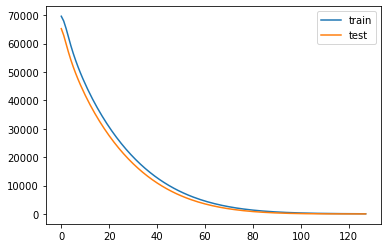

In [231]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras.layers import LSTM, Dense
import matplotlib
from matplotlib import pyplot as plt

# design network
model = tf.keras.models.Sequential()
model.add(LSTM(50, input_shape=(train_real.shape[1], train_real.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
# fit network
history = model.fit(train_real, train_y_real, epochs=500, batch_size=72, validation_data=(val_real, val_y_real), verbose=2, shuffle=False, callbacks=[early_stopping])
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [232]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_subset.drop(columns=["time", "t"]))

In [233]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy import concatenate

# make a prediction
yhat = model.predict(test_real)
np.mean(abs(yhat - test_y_real))

1/1 [==============================] - 0s 300ms/step


0.4300881869845937

In [212]:
np.mean(abs(yhat - test_y_real))

0.4525643522135433

In [213]:
yhat

array([[257.81403],
       [257.80063],
       [257.79388],
       [257.7721 ],
       [257.75974],
       [257.75473],
       [257.7746 ],
       [257.7943 ],
       [257.81534],
       [257.8223 ],
       [257.821  ],
       [257.82254],
       [257.82407],
       [257.82187],
       [257.81134],
       [257.79187],
       [257.7784 ],
       [257.77042],
       [257.73114],
       [257.71048],
       [257.66495],
       [257.5917 ],
       [257.24823],
       [256.9093 ]], dtype=float32)

In [214]:
test_y_real

array([257.35516, 257.43393, 257.47446, 257.4317 , 257.31693, 257.18414,
       257.06262, 256.9951 , 256.96133, 256.91183, 257.06262, 257.07837,
       257.18863, 257.34393, 257.46994, 257.5307 , 257.5172 , 257.4677 ,
       257.42493, 257.42044, 257.4587 , 257.51495, 257.39795, 257.3777 ])